# Day 7: Regularization & Overfitting


**Focus:** How to prevent models from becoming “too smart” and memorizing training data instead of generalizing.

In this notebook, we’ll explore:
- Overfitting and why it happens  
- L1 (Lasso) and L2 (Ridge) regularization  
- Elastic Net (combination of L1 and L2)  
- Early stopping in tree-based models  
- Visualization of training vs. validation performance


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
import xgboost as xgb


In [2]:

# Generate synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Baseline Model: Linear Regression

In [3]:

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

baseline_mse = mean_squared_error(y_test, y_pred)
print("Baseline Linear Regression MSE:", baseline_mse)


Baseline Linear Regression MSE: 257.12440513436655


## Ridge Regression (L2 Regularization)

In [4]:

ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

ridge_mse = mean_squared_error(y_test, y_pred_ridge)
print("Ridge Regression MSE:", ridge_mse)


Ridge Regression MSE: 261.17608266149125


## Lasso Regression (L1 Regularization)

In [5]:

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

lasso_mse = mean_squared_error(y_test, y_pred_lasso)
print("Lasso Regression MSE:", lasso_mse)
print("Number of features used:", np.sum(lasso.coef_ != 0))


Lasso Regression MSE: 256.3189861633601
Number of features used: 20


## Elastic Net (Combination of L1 & L2)

In [6]:

elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(X_train, y_train)
y_pred_elastic = elastic.predict(X_test)

elastic_mse = mean_squared_error(y_test, y_pred_elastic)
print("Elastic Net MSE:", elastic_mse)


Elastic Net MSE: 345.9234209790998


## Coefficient Comparison

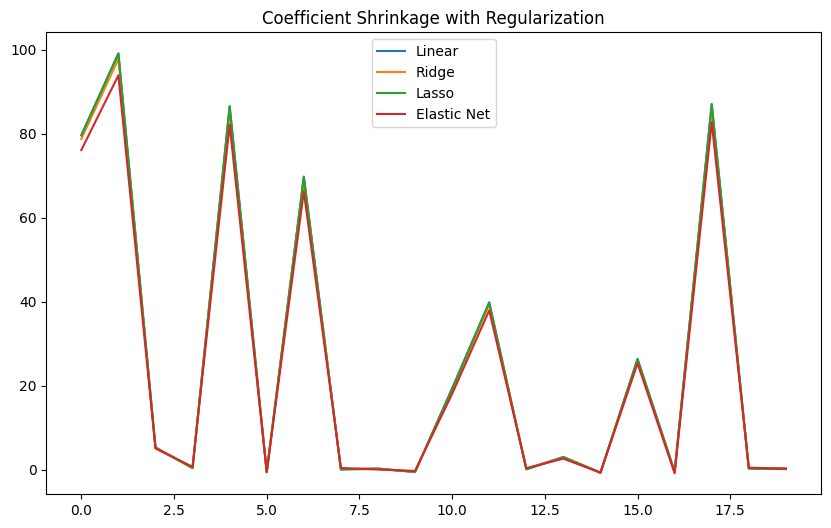

In [7]:

plt.figure(figsize=(10,6))
plt.plot(lin_reg.coef_, label="Linear")
plt.plot(ridge.coef_, label="Ridge")
plt.plot(lasso.coef_, label="Lasso")
plt.plot(elastic.coef_, label="Elastic Net")
plt.legend()
plt.title("Coefficient Shrinkage with Regularization")
plt.show()


## Early Stopping with XGBoost

In [8]:

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    "objective": "reg:squarederror",
    "max_depth": 5,
    "eta": 0.1
}

evals = [(dtrain, "train"), (dtest, "eval")]
model = xgb.train(params, dtrain, num_boost_round=500, evals=evals,
                  early_stopping_rounds=20, verbose_eval=False)

print("Best iteration:", model.best_iteration)
print("Best validation score:", model.best_score)


Best iteration: 326
Best validation score: 56.81620422371949



 **Key Takeaway:**  
Regularization is like teaching models humility — instead of memorizing everything, they learn to focus on the most meaningful signals.  
It’s one of the most powerful tools to improve generalization and keep models honest.
